# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
path1 = '/Users/claywrentz/Desktop/ML-Fontenot/MLProject2/Dataset1/train.xlsx' 
path2 = '/Users/claywrentz/Desktop/ML-Fontenot/MLProject2/Dataset2.csv'

flight1 = pd.read_excel(path1)
flight2 = pd.read_csv(path2)

The first data set contains data on airfare prices for different flights, I can't find where the data was scraped from however I got it from [this](https://www.kaggle.com/datasets/zwartfreak/airline-fare-prediction?select=train.xlsx) link. It is split into a train and test set. The train set has 10,683 entries and the test set has 2,671 entries. Both sets have 11 different attributes. For this analysis I will only be using the train set. The prediction attribute is price. This data set uses numbers to represent the time of day. 

In [3]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


The second data set also contains data on airfare prices for different flights, but specifically focuses on flight travel between India's top 6 metro cities. This data is collected from the website "Easemytrip" and I found it at [this](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv) link. This dataset uses categories to represent the time of day (morning, evening, etc.). This datasets prediction attribute is also price. This dataset has 300,153 entries and 11 different attributes. 



In [4]:
flight2.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Questions 

1. Is there any trend based on what day of the week you buy a flight and how much it costs.

2. What are the most expensive regions to fly to?

3. Is there a major price difference between flights that have stops and flights that don't?

4. How/why do prices vary with different airlines?



### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

### Data Set 1

In [5]:
flight1.columns = [c.replace(' ', '_') for c in flight1.columns]
flight1.info()
flight1.shape
flight1.Additional_Info.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

**Airline:** Nominal categorical variable, 12 categories

**Date of Journey:** Continuous numerical variable, initially stored as a string, will be datetime
    
**Source:** Nominal categorical variable, 5 categories
    
**Destination:** Nominal categorical variable, 6 categories
    
**Route:** Nominal categorical variable, 129 categories
    
**Departure Time:** Continuous numerical variable, initially stored as a string, will be datetime
    
**Arrival Time:** Continuous numerical variable, initially stored as a string, will be datetime
    
**Duration:** Discrete numerical variable, initially stored as a string
    
**Total Stops:** Discrete numerical variable
    
**Additional Info:** Nominal categorical variable, 10 categories
    
**Price:** Discrete numerical variable, stored as an int




This dataset has 11 attributes and 10,683 entries, which is 117,513 total data points. 


In [6]:
flight1['Date_of_Journey'] = pd.to_datetime(flight1['Date_of_Journey'])
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [7]:
flight1 = flight1.sort_values(by='Date_of_Journey')
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25736


In [8]:
flight1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9873,Multiple carriers,2019-12-06,Delhi,Cochin,DEL → BOM → COK,09:15,19:00,9h 45m,1 stop,No info,11623
5993,IndiGo,2019-12-06,Kolkata,Banglore,CCU → MAA → BLR,08:10,13:00,4h 50m,1 stop,No info,5070
7260,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,22:50,19:00 13 Jun,20h 10m,1 stop,No info,14715
4997,Air Asia,2019-12-06,Kolkata,Banglore,CCU → DEL → BLR,07:35,23:30,15h 55m,1 stop,No info,5193
1081,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 13 Jun,6h 35m,1 stop,In-flight meal not included,10263


I changed Date of Journey to a datetime object in order to have the same format for all entries. After sorting by this column, we can see that the data has dates beginning on 01/03/2019 and spanning until 12/06/2019; a timespan of about one year. We can see above that there is very few missing datapoints. Route and Total Stops are the only columns missing data and they are both missing only one entry. 

In [9]:
flight1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 959 to 1081
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.5+ KB


### Dataset 2

In [10]:
flight2.columns = [c.replace(' ', '_') for c in flight2.columns]
flight2 = flight2.drop('Unnamed:_0', 1)
flight2.info()
flight2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_76806/4202729272.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  flight2 = flight2.drop('Unnamed:_0', 1)


(300153, 11)

In [11]:
x = flight2['class'].unique()
len(x)

2

**Airline:** Nominal categorical variable, 6 categories

**Flight:** Nominal categorical variable, 1561 categories

**Source City:** Nominal categorical variable, 6 categories

**Departure Time:** Ordinal categorical variable, 6 categories

**Stops:** Discrete numerical variable, initially stored as a string (not an int)

**Arrival Time:** Ordinal categorical variable, 6 categories

**Destination City:** Nominal categorical variable, 6 categories

**Class:** Nominal categorical variable, 2 categories

**Duration:** Continuous numerical variable, stored as float

**Days Left:** Discrete numerical variable, stored as int

**Price:** Discrete numerical variable, stored as an int

This dataset has 11 attributes and 300,153 entries, which is 3,301,683 total data points.

There are no dates included in the dataset, however using the description from Kaggle we can see this data was collected for flights departing on 02/11/2022 through 03/31/2022. This dataset is limited to a much smaller timespan, only 1.5 months. 
There is no missing data, all columns have 300,153 non-null entries. 

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

First step is to change all numeric data (that's not a date) to integers. Then we can better understand each variable.
### Dataset 1

In [12]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25736


I started by converting the Duration column from a string to an int. I multiplied the total hours by 60 and added the minutes, so now the duration is measured in minutes. 

In [13]:
h = flight1['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = flight1['Duration'].str.extract('(\d+)m', expand=False).astype(float)

flight1['Duration'] = h.add(m, fill_value=0).astype(int)
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,785,1 stop,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,485,1 stop,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,740,1 stop,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,2345,2 stops,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,1425,1 stop,No info,25736


I also shortened the Arrival Time column to include only the first 5 characters, meaning just the time. If I need to know what date the column is referencing I will use the duration column + departure time column. Right now the Arrival Time column is still an object but it will later be changed to a datetime type. 

In [14]:
flight1['Arrival_Time'] = flight1['Arrival_Time'].str[0:5]

Next I dropped all the rows from dataset 1 that have null entries. This ended up being only one row because, as stated earlier, there are only two null entries and they happened to be in the same row. Therefore, dropping all rows with null entries has a miniscule effect on the overall data. Then, I formatted the Total stops column to only contain an int, and changed its type to int.

In [15]:
flight1 = flight1.dropna(0)
flight1['Total_Stops'] = flight1['Total_Stops'].str[0:1]
flight1['Total_Stops'] = [c.replace('n', '0') for c in flight1['Total_Stops']]
flight1['Total_Stops'] = flight1['Total_Stops'].astype(int)

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_76806/1157681791.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  flight1 = flight1.dropna(0)


In [16]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45,785,1,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,485,1,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,740,1,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55,2345,2,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25,1425,1,No info,25736


The data from dataset 1 now appears to be ready to be put into the data dictionary. 

In [17]:
flight1['Airline'].unique()

array(['Jet Airways', 'SpiceJet', 'Air India', 'IndiGo', 'Air Asia',
       'Vistara', 'GoAir', 'Jet Airways Business', 'Multiple carriers',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

#### Airline
This variable represents all the different airlines available for travel in dataset 1. This includes Jet Airways, SpiceJet, Air India, IndiGo, Air Asia, Vistara, GoAir, Jet Airways Business, multiple carriers, Vistara premium economy, Trujet, and multiple carriers premium economy. Multiple carriers means that multiple different airlines were taken to get to the final destination. 

<function matplotlib.pyplot.show(close=None, block=None)>

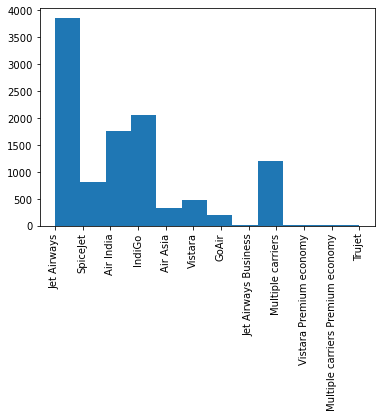

In [23]:
plt.hist(flight1['Airline'], bins = 12, density = False)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

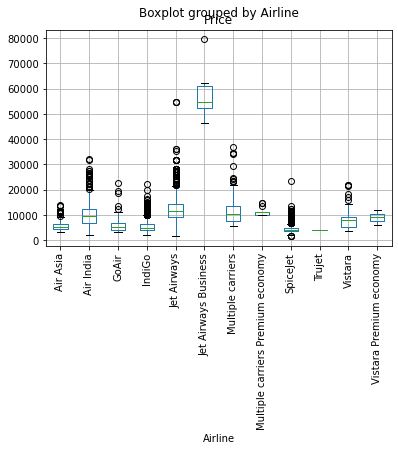

In [28]:
flight1.boxplot(column = 'Price', by = 'Airline')
plt.xticks(rotation=90)
plt.show

#### Date of Journey

This variable represents the date that the journey began, meaning the date that the flight departs. It is saved as a datetime object in the format YYYY-MM-DD. This variable is a little bit inbetween categorical and numeric. The representation of it includes numbers, however these numbers can't alone be used for calculation. You have to take other logic into account such as the number of days in a month or year. Also you can't calculate the average. The data also isn't exactly categorical because if we considered it that there would be too many categories. Although its not exactly numeric, we can still calculate the min, max, and median. The min is 01/03/2019 and the max is 12/06/2019. The median is 05/24/2019. The date with the highest number of flights was 05/18/2019.



<function matplotlib.pyplot.show(close=None, block=None)>

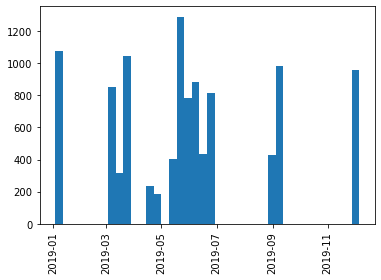

In [31]:
plt.hist(flight1['Date_of_Journey'], bins = 40, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Source

This variable represents the location of which the flight is departing from. This is a categorical variable consisting of 5 categories: Banglore, Chennai, Delhi, Kolkata, and Mumbai. Most of the flights were made from Delhi, with the second most being from Banglore and Kolkata. 

<function matplotlib.pyplot.show(close=None, block=None)>

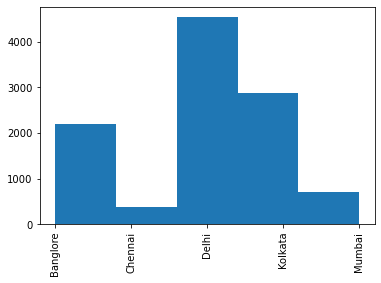

In [34]:
plt.hist(flight1['Source'], bins = 5, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Destination

This variable represents the location of which the flight is landing at. This is a categorical variable consisting of 6 categories: New Delhi, Kolkata, Cochin, Banglore, Hyderabad, and Delhi. Most of the flights were made to Cochin, with Banglore coming in second. 

<function matplotlib.pyplot.show(close=None, block=None)>

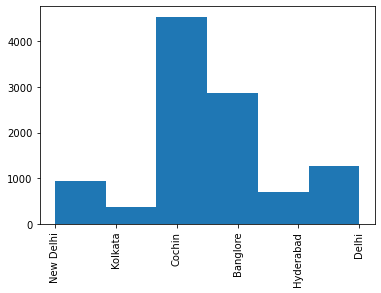

In [37]:
plt.hist(flight1['Destination'], bins = 6, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Route 

This variable represents the path that was taken to get from the source to destination. It consists of the names of locations in the order of which they were reached by the flight. It is a categorical variable of 129 different categories. The most popular route is DEL -> BOM -> COK with 2,376 total flights through this path in the timespan that the data was recorded. The mean number of flights for each path is 83, with a minimum of 1. 

In [52]:
x = flight1.groupby('Route').count()
x.head()
x = x.sort_values(by='Airline')
x.tail()
x.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125
std,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
max,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000


#### Departure Time

This variable represents the time that the flight departed the airport on the day found in the Date of Journey column. 

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 